In [2]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
# Split Data Into Train and Test Data
def splitIntoTestAndTrain(dataFrame,splitBy):
    rand = list(range(len(dataFrame)))
    div = int(len(dataFrame) * splitBy)
    rd.shuffle(rand)
    train_df_index = rand[:div]
    test_df_index = rand[div:]
    train_df = dataFrame.iloc[train_df_index, :]
    test_df = dataFrame.iloc[test_df_index, :]
    return train_df,test_df;

In [4]:
#Best SVM Classifier
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn import svm, grid_search
def svc_param_selection(X, y, nfolds):
    param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [10.**i for i in np.arange(-2,2)]},
                    {'kernel': ['linear'], 'C': [10.**i for i in np.arange(-2,2)]}]
    grid_search = GridSearchCV(svm.SVC(probability=True), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_estimator_

/Users/amanmahato/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/amanmahato/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [11]:
def reportCard(y_true, y_pred, y_proba,name):
    from sklearn import metrics
    import matplotlib.pyplot as plt
    %matplotlib inline
    print('\nReport for:',name)
    target_names = ['low', 'high']
    print(metrics.classification_report(y_true, y_pred, target_names=target_names))
    print("Confusion Matrix\n",metrics.confusion_matrix(y_true,y_pred))
    print("F1 Score:",metrics.f1_score(y_true,y_pred))
    print("Accuracy:",metrics.accuracy_score(y_true,y_pred))
    print("Log Loss:",metrics.log_loss(y_true,y_pred))
    print("AUC Score:",metrics.roc_auc_score(y_true,y_proba[:,1]))
    fpr,tpr,thresholds = metrics.roc_curve(y_true,y_proba[:,1])
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve for {}'.format(name))
    plt.legend(loc='best')
    plt.show()

In [12]:
def svm_run(filename):
    print("\nRunning for",filename)
    df = pd.read_csv(filename+'.csv', sep=",")
    if df.shape[0]>5000:
        df = df[:5000]
    print("dataset size is:",df.shape)
    print("columns:",df.columns)
    print("\nSVM")
    #vectorization
    df = df.ix[:,['Clean_Text']+['ScoreLabel']]
    df = df.dropna()
    outc = df.ix[:,'ScoreLabel']
    row = df.shape[0]
    istest = np.repeat(np.repeat([False,True],[9,1]), 1+row/10)[:row]
    np.random.shuffle(istest)
    vect = TfidfVectorizer()
    fitted = vect.fit_transform(df.ix[~istest,'Clean_Text'])
    test = vect.transform(df.ix[istest,'Clean_Text'])
    best_svm = svc_param_selection(fitted, outc[~istest],5)#check validation
    grid_svm_pred = best_svm.predict(test)
    grid_svm_pred_prob = best_svm.predict_proba(test)
    print("*****BOF: {}*****".format(filename))
    reportCard(outc[istest], grid_svm_pred, grid_svm_pred_prob,'GridSearched SVM With TFIDF')
    print("*****EOF: {}*****".format(filename))


Running for iot_posts_with_readibility_measures_score_adj
dataset size is: (1140, 31)
columns: Index(['AcceptedAnswerId', 'AnswerCount', 'Body', 'ClosedDate', 'CommentCount',
       'CommunityOwnedDate', 'CreationDate', 'FavoriteCount', 'Id',
       'LastActivityDate', 'LastEditDate', 'LastEditorUserId',
       'OwnerDisplayName', 'OwnerUserId', 'ParentId', 'PostTypeId', 'Score',
       'Tags', 'Title', 'ViewCount', 'Flesch_Reading_Ease_Value',
       'Coleman_Liau_Index_Value', 'Dale_Chall_Readability_Score',
       'Code_Count', 'Latex_Count', 'Clean_Text', 'Text_Length', 'Punc_Rate',
       'Polarity', 'Subjectivity', 'ScoreLabel'],
      dtype='object')

SVM
*****BOF: iot_posts_with_readibility_measures_score_adj*****

Report for: GridSearched SVM With TFIDF
             precision    recall  f1-score   support

        low       1.00      0.66      0.79        29
       high       0.88      1.00      0.94        74

avg / total       0.91      0.90      0.90       103

Confusion M

/Users/amanmahato/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


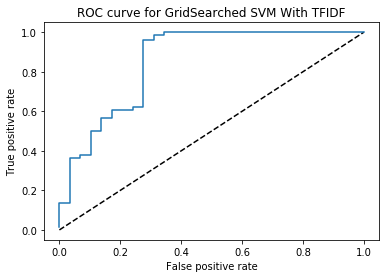

*****EOF: iot_posts_with_readibility_measures_score_adj*****


In [9]:
svm_run("iot_posts_with_readibility_measures_score_adj")


Running for ai_posts_with_readibility_measures_score_adj
dataset size is: (1735, 31)
columns: Index(['AcceptedAnswerId', 'AnswerCount', 'Body', 'ClosedDate', 'CommentCount',
       'CreationDate', 'FavoriteCount', 'Id', 'LastActivityDate',
       'LastEditDate', 'LastEditorDisplayName', 'LastEditorUserId',
       'OwnerDisplayName', 'OwnerUserId', 'ParentId', 'PostTypeId', 'Score',
       'Tags', 'Title', 'ViewCount', 'Flesch_Reading_Ease_Value',
       'Coleman_Liau_Index_Value', 'Dale_Chall_Readability_Score',
       'Code_Count', 'Latex_Count', 'Clean_Text', 'Text_Length', 'Punc_Rate',
       'Polarity', 'Subjectivity', 'ScoreLabel'],
      dtype='object')

SVM
*****BOF: ai_posts_with_readibility_measures_score_adj*****

Report for: GridSearched SVM With TFIDF
             precision    recall  f1-score   support

        low       0.64      1.00      0.78       101
       high       0.00      0.00      0.00        58

avg / total       0.40      0.64      0.49       159

Confusion 

/Users/amanmahato/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/amanmahato/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/amanmahato/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


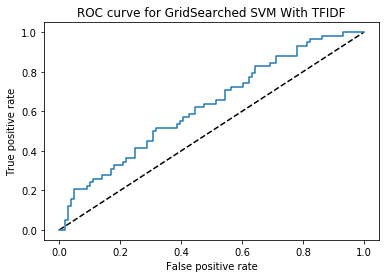

*****EOF: ai_posts_with_readibility_measures_score_adj*****


In [10]:
svm_run("ai_posts_with_readibility_measures_score_adj")


Running for stats_posts_with_readibility_measures_score_adj
dataset size is: (5000, 32)
columns: Index(['AcceptedAnswerId', 'AnswerCount', 'Body', 'ClosedDate', 'CommentCount',
       'CommunityOwnedDate', 'CreationDate', 'FavoriteCount', 'Id',
       'LastActivityDate', 'LastEditDate', 'LastEditorDisplayName',
       'LastEditorUserId', 'OwnerDisplayName', 'OwnerUserId', 'ParentId',
       'PostTypeId', 'Score', 'Tags', 'Title', 'ViewCount',
       'Flesch_Reading_Ease_Value', 'Coleman_Liau_Index_Value',
       'Dale_Chall_Readability_Score', 'Code_Count', 'Latex_Count',
       'Clean_Text', 'Text_Length', 'Punc_Rate', 'Polarity', 'Subjectivity',
       'ScoreLabel'],
      dtype='object')

SVM
*****BOF: stats_posts_with_readibility_measures_score_adj*****

Report for: GridSearched SVM With TFIDF
             precision    recall  f1-score   support

        low       0.00      0.00      0.00       126
       high       0.75      1.00      0.85       369

avg / total       0.56      0

/Users/amanmahato/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/amanmahato/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


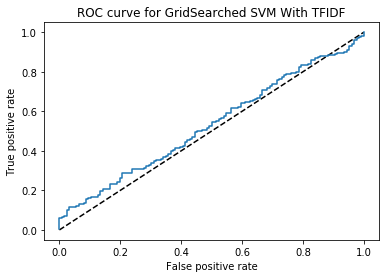

*****EOF: stats_posts_with_readibility_measures_score_adj*****


In [13]:
svm_run("stats_posts_with_readibility_measures_score_adj")
